In [1]:
# First write up / program your algorithm using the library tools
# See examples/nearest_neighbors.py for a complete example (a k-nearest neighbors classifier)

In [2]:
# Load a data set
from mlcv.datasets import fetcher

# In this case we wrote a classification algorithm, so we use a data set with categorical targets (classes)
X, y = fetcher.load_iris()

In [3]:
# X are our data points and y are the targets (class labels)
# Let's see how the first 5 points look like
X[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [4]:
# And the first 5 labels
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
# It seems like a good idea to shuffle our data, so that our estimator does not just memorize the order of the targets
# This would not happen here (with k-nn), but could happen for many other algorithms. 
# This can be considered one form of preprocessing. You should consider what other forms of preprocessing might 
# be essential for your estimator.

In [6]:
import numpy as np

# Make sure to shuffle inputs and targets in the exact same way
n_samples = len(y)
permutation = np.random.permutation(n_samples)

X = X[permutation]
y = y[permutation]

In [7]:
# Split the data in training and testing set
# Here we use 70% of the data as training data and the rest for testing.
# `stratify` makes sure we have training and test samples in the same proportions for all classes 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)

/work/chiotell/projects/scikit-learn/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
# Instantiate your model
from examples.nearest_neighbors import KNNClassifier

# Pass any parameters you need to choose
knn = KNNClassifier(k=3)

# See the model parameters
print(knn)

KNNClassifier(k=3, metric='euclidean')


In [9]:
# Train your model
knn.fit(X_train, y_train)

KNNClassifier(k=3, metric='euclidean')

In [10]:
# Predict with the trained model
y_pred = knn.predict(X_test)

In [11]:
# Evaluate your model
test_acc = knn.score(y_pred, y_test)
print('3-nearest neighbors test accuracy: {:5.2f}%.'.format(test_acc*100))

3-nearest neighbors test accuracy: 95.56%.


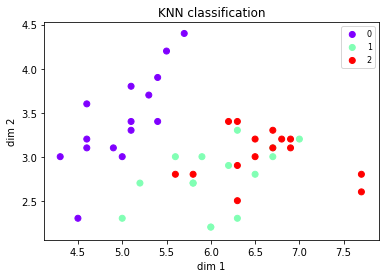

In [12]:
# Possibly visualize something your model learned
from matplotlib import pyplot as plt

knn.visualize(X_test, proba=knn.predict_proba(X_test))
plt.show()